# Plots and Graphs

Now let’s use R on some real world data to create different plots. Specifically we will be using a library in the `tidyverse` called `ggplot2`. You don't need to worry about loading `ggplot2` specifically. As long as you load `tidyverse` it will load `ggplot2` for you. 

Let's load `tidyverse` right now

In [1]:
library(tidyverse)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.3     ✔ purrr   0.3.4
✔ tibble  3.0.4     ✔ dplyr   1.0.2
✔ tidyr   1.1.2     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.0

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



## ggplot2

Although R does provide built-in plotting functions, the `ggplot2` library implements the Grammar of Graphics. This makes it particularly effective for describing how visualizations should represent data, and has turned it into the preeminent plotting library in R. Learning this library will allow you to make nearly any kind of (static) data visualization, customized to your exact specifications. 

### Grammar of Graphics

Just as the grammar of language helps us construct meaningful sentences out of words, the Grammar of Graphics helps us to construct graphical figures out of different visual elements. This grammar gives us a way to talk about parts of a plot: all the circles, lines, arrows, and words that are combined into a diagram for visualizing data. Originally developed by Leland Wilkinson, the Grammar of Graphics was adapted by Hadley Wickham to describe the components of a plot, including

1. the data being plotted
2. the geometric objects (circles, lines, etc.) that appear on the plot
3. a set of mappings from variables in the data to the aesthetics (appearance) of the geometric objects
4. a statistical transformation used to calculate the data values used in the plot
5. a position adjustment for locating each geometric object on the plot
6. a scale (e.g., range of values) for each aesthetic mapping used
7. a coordinate system used to organize the geometric objects
8. the facets or groups of data shown in different plots

Wickham further organizes these components into layers, where each layer has a single geometric object, statistical transformation, and position adjustment. Following this grammar, you can think of each plot as a set of layers of images, where each image’s appearance is based on some aspect of the data set.

All together, this grammar enables us to discuss what plots look like using a standard set of vocabulary. 

#### The Basics

There are numerous ways to create a plot. The most general way is of the following form:

> Call the ggplot() function with your data to create a blank canvas
> Specify aesthetic mappings, which specifies how you want to map variables to visual aspects.
> You then add new layers that are geometric objects which will show up on the plot.

The syntax for this is given by
```
ggplot(data=DATA)+
GEOM_FUNCTION(mapping =
aes(MAPPINGS),stat=STAT,position=POSITION)+
COORDINATE_FUNCTION+
FACET_FUNCTION
```

Each of the ALL_CAPS variables above will be items that will be individual to the data and plot you want to create.

For instance in our first lab one of our projects was to a histogram of enzymatic reaction rates in the Puromycin data set. Let’s do this with ggplot2. 

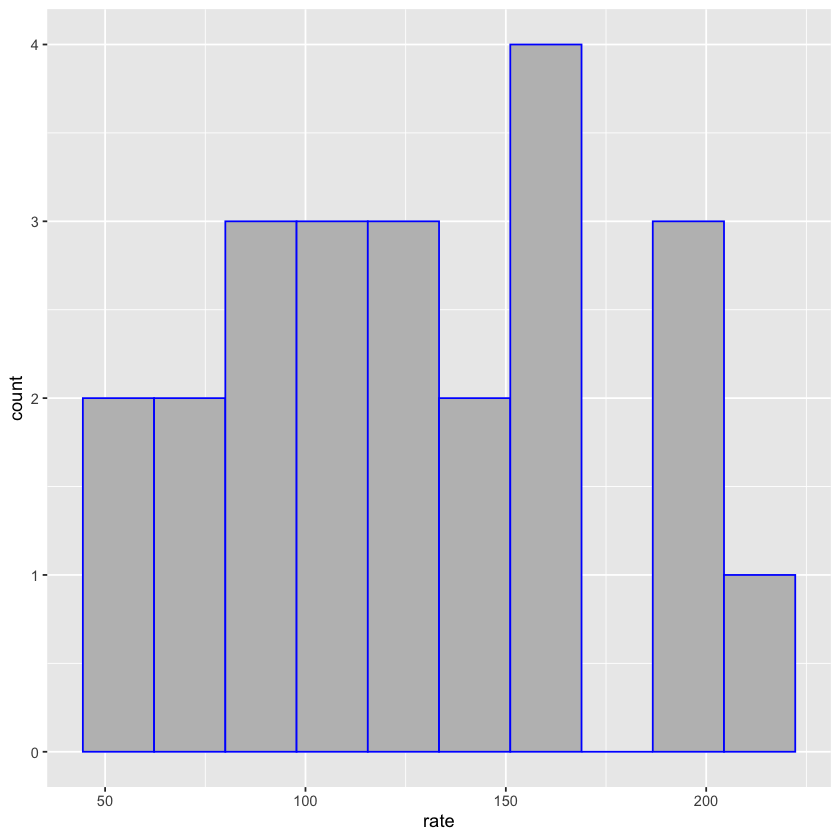

In [2]:
ggplot(data=Puromycin)+
    geom_histogram(aes(x=rate),color="blue",fill="gray",bins=10)

Another part of the project was to create two histograms; one for treated and one for untreated. We can plot both of these histograms on the same plot

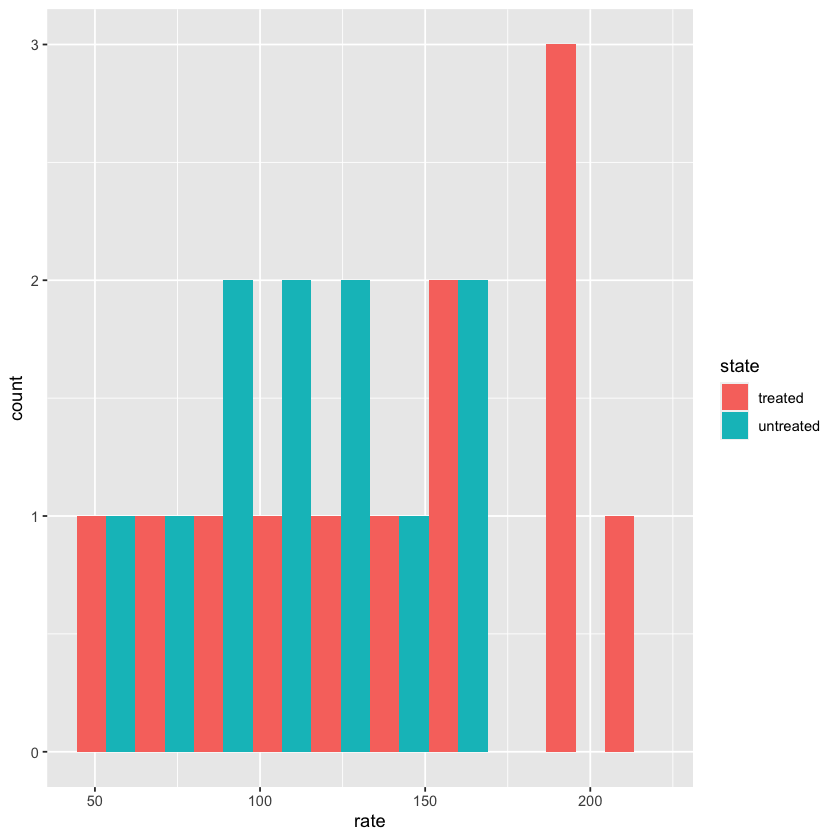

In [3]:
ggplot(data = Puromycin) +
    geom_histogram(aes(x = rate,fill = state), bins=10, position = "dodge")

Note that when I added the geom layer I used the addition (+) operator. This lets R know that I am continuing the code on a new line. As you add new layers you can always use + to add onto your visualization and keep the lines of your code nice and tidy. 

#### Aesthetics

The aesthetic mappings take properties of the data and use them to influence visual characteristics, such as position, color, size, shape, or transparency. Each visual characteristic can thus encode an aspect of the data and be used to convey information.

All aesthetics for a plot are specified in the `aes()` function call (later in this tutorial you will see that each geom layer can have its own `aes()` specification). What exactly would this look like? 

The `mpg` data set contains fuel economy data from 1999 and 2008 for 38 popular models of cars. It is part of the `ggplot2` library. Let's look at the structure of this data set

In [30]:
str(mpg)

tibble [234 × 11] (S3: tbl_df/tbl/data.frame)
 $ manufacturer: chr [1:234] "audi" "audi" "audi" "audi" ...
 $ model       : chr [1:234] "a4" "a4" "a4" "a4" ...
 $ displ       : num [1:234] 1.8 1.8 2 2 2.8 2.8 3.1 1.8 1.8 2 ...
 $ year        : int [1:234] 1999 1999 2008 2008 1999 1999 2008 1999 1999 2008 ...
 $ cyl         : int [1:234] 4 4 4 4 6 6 6 4 4 4 ...
 $ trans       : chr [1:234] "auto(l5)" "manual(m5)" "manual(m6)" "auto(av)" ...
 $ drv         : chr [1:234] "f" "f" "f" "f" ...
 $ cty         : int [1:234] 18 21 20 21 16 18 18 18 16 20 ...
 $ hwy         : int [1:234] 29 29 31 30 26 26 27 26 25 28 ...
 $ fl          : chr [1:234] "p" "p" "p" "p" ...
 $ class       : chr [1:234] "compact" "compact" "compact" "compact" ...


We can visualize the relationship between the engine displacement and miles per gallon on the highway in a simple scatter plot. Engine displacement is a measure of the volume displaced by the engine during one full piston cycle. In general, the larger the engine the larger the displacement. Since fuel economy generally decreases as engine size increases, we should see a downward trend in our scatter plot.

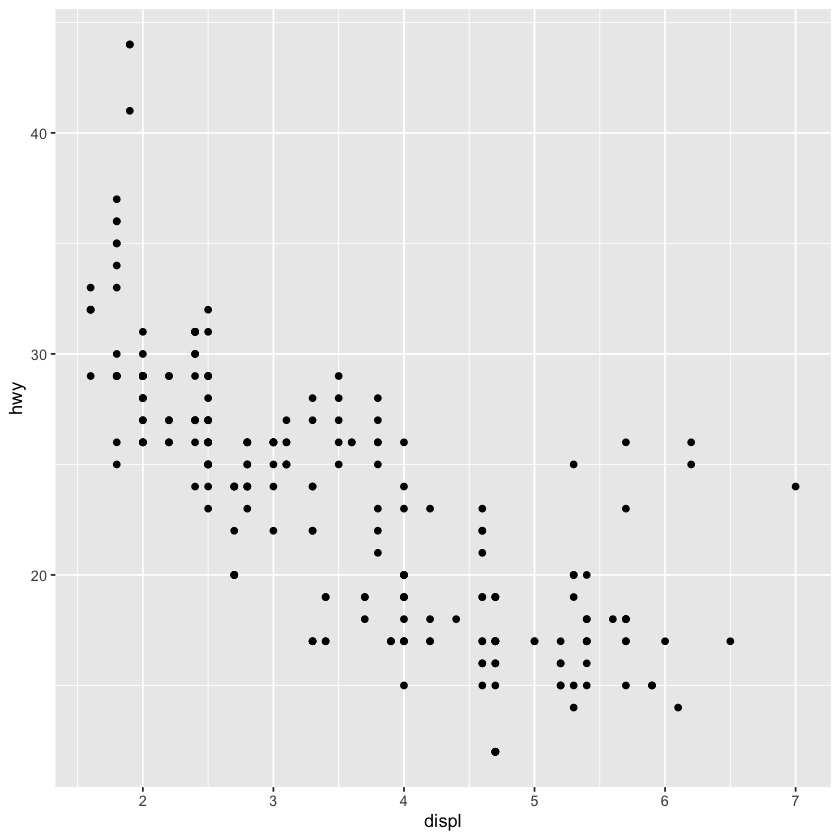

In [32]:
ggplot(mpg,aes(x = displ, y = hwy)) +
    geom_point()

We can see that there is a downward trend, i.e. the mpg decreases as the engine displacement increases. However, we can introduce even more information contained in the data set by adding a mapping from the class of the cars to a color characteristic: 

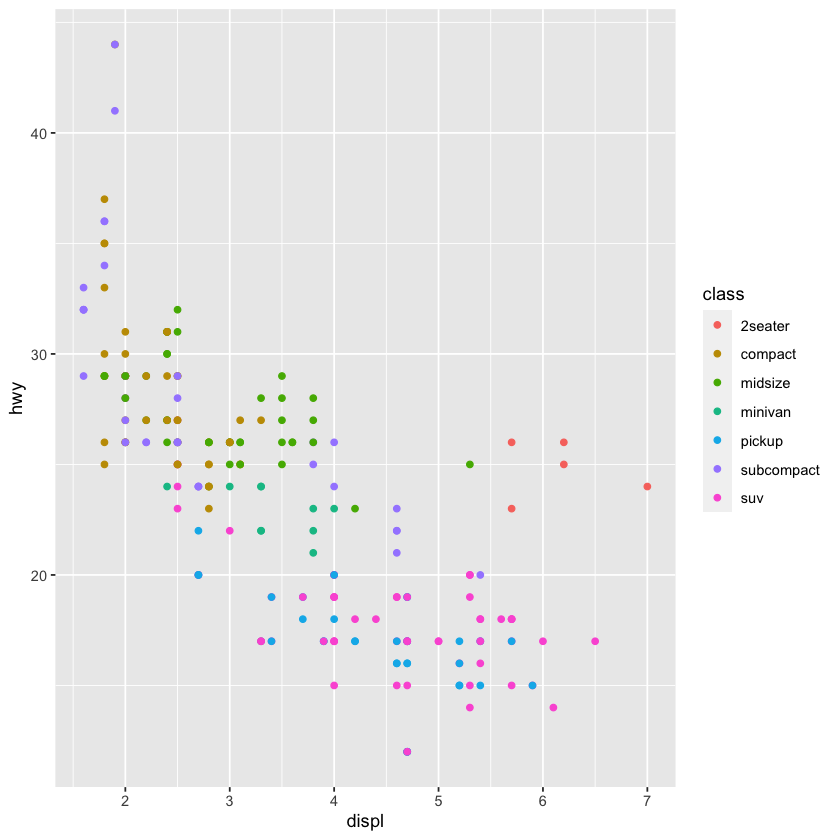

In [13]:
ggplot(mpg, aes(x = displ, y = hwy, color = class)) +
    geom_point()

Now we can visualize the trend across types of cars. For instance, we can see that SUVs have consistenly low highway mpg and the downward trend related to engine displacement isn’t as significant. 

The `aes(x = displ, y = hwy, color = class)` call tells `ggplot` what values should be on the x and y axes as to assign a color for each distinct observation in the `class` column. This information is only essential to the geometry `geom_point` and so we could have made this call in `geom_point()` rather than `ggplot()`.  

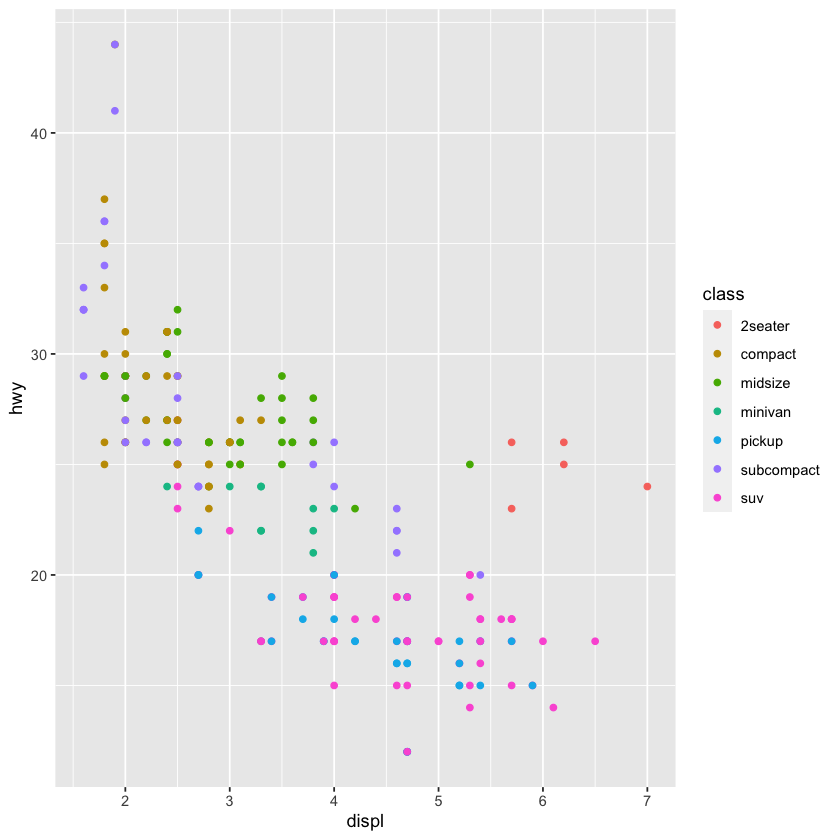

In [14]:
ggplot(mpg) +
    geom_point(aes(x = displ, y = hwy, color=class))

What's the difference between `ggplot(mpg, aes(x = displ, y = hwy, color=class))+geom_point()` and `ggplot(mpg)+geom_point(aes(x = displ, y = hwy, color=class))`? The first assigns the aesthetics to the whole plot and the second only applies aesthetics to the point geometry. Keep this in mind when coding, i.e. aesthetics for the whole plot should be in the `ggplot` argument whereas aesthetics for a specific layer should go in `GEOM_FUNCTION()`. For instance, consider the two plots where we color the points according to `class` and draw a line of best fit 

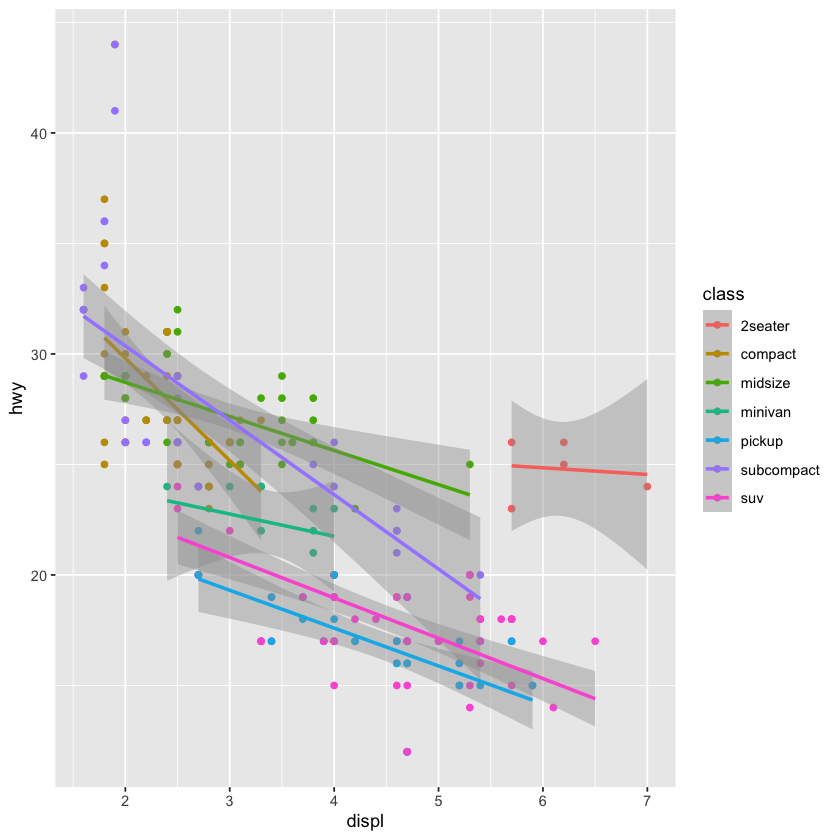

In [24]:
ggplot(mpg, aes(x = displ, y = hwy, color = class)) +
    geom_point()+
    geom_smooth(method='lm', formula= y~x)

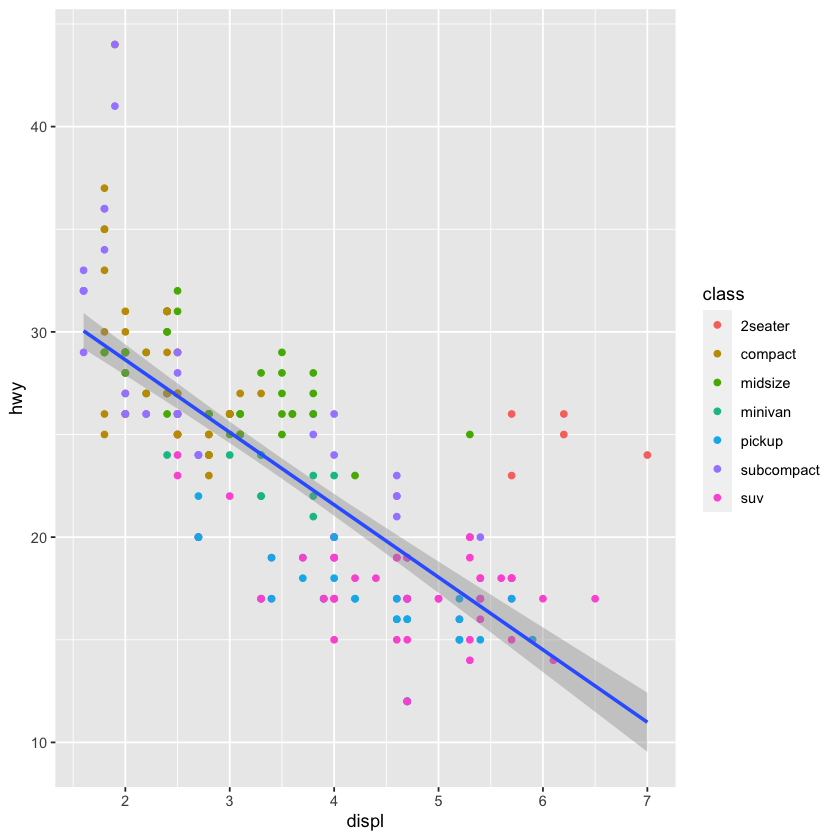

In [23]:
ggplot(mpg, aes(x = displ, y = hwy)) +
    geom_point(aes(color = class))+
    geom_smooth(method='lm', formula= y~x)

In the first plot, `ggplot` assigns the `color=class` to the regression lines and gives a regression line for each class whereas in the second plot `ggplot` only assigns the `color=class` to the points

#### Specifying Geometric Shapes

Building on these basics, `ggplot2` can be used to build almost any kind of plot you may want. These plots are declared using functions that follow from the Grammar of Graphics.

The most obvious distinction between plots is what geometric objects (geoms) they include. The package `ggplot2` supports a number of different types of geoms, including:

- `geom_point` for drawing individual points (e.g., a scatter plot)
- `geom_line` for drawing lines (e.g., for a line charts)
- `geom_smooth` for drawing smoothed lines (e.g., for simple trends, regressions, or approximations)
- `geom_bar` for drawing bars (e.g., for bar charts)
- `geom_histogram` for drawing binned values (e.g. a histogram)
- `geom_polygon` for drawing arbitrary shapes
- `geom_map` for drawing polygons in the shape of a map! (You can access the data to use for these maps by using the map_data() function).

You can find a full list of the geometries here, https://ggplot2.tidyverse.org/reference/, as well as other `ggplot2` functions. 

Each of these geometries will leverage the aesthetic mappings supplied in the `aes()` function, although the specific visual properties that the data will map to will vary. For example, you can map data with the geom `geom_point` (e.g., if they should be circles or squares), or you can map data to the line type of a `geom_line` (e.g., if it is solid or dotted), but not vice versa.

Almost all geoms require an x and y mapping at the bare minimum. Here are some examples of the geoms listed above. 

`geom_point`:

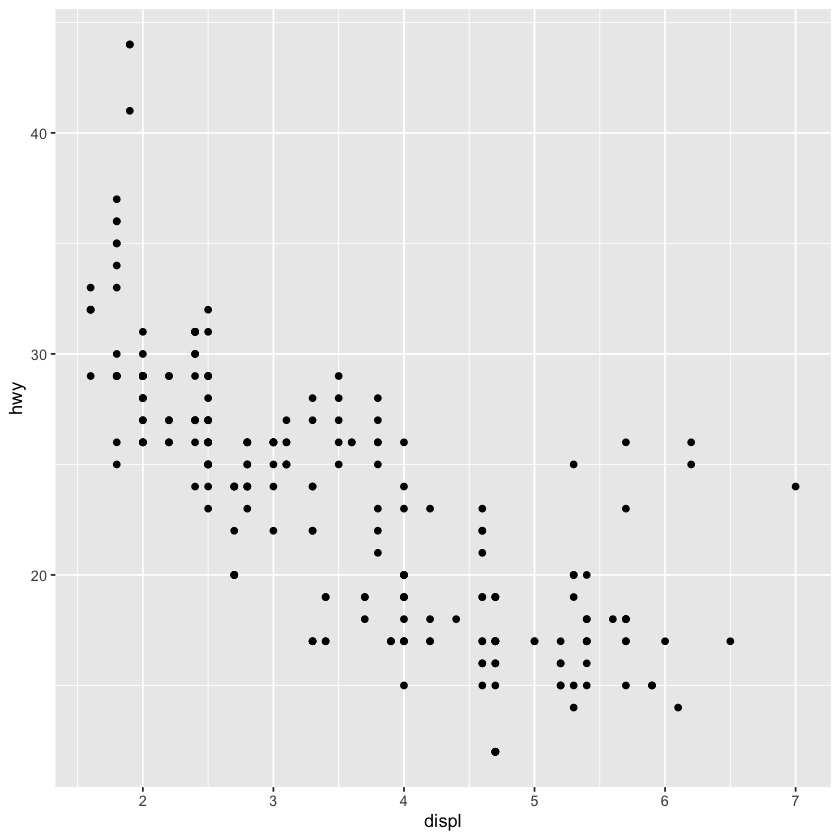

In [25]:
ggplot(mpg, aes(x = displ, y = hwy)) +
    geom_point()

`geom_bar`:

A bar plot is commonly used for categorical data and so we will use `x=class`. 

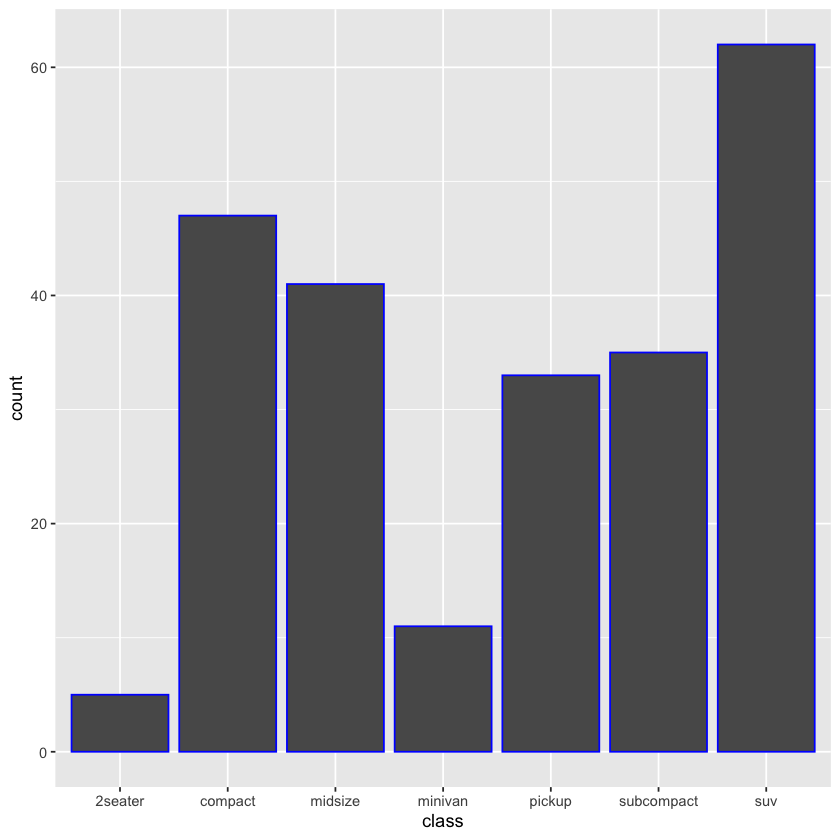

In [47]:
ggplot(data = mpg, aes(x = class)) +
    geom_bar(color="blue") 

`geom_histogram`:

Histograms are generally used for numerical data that is divided into bins.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



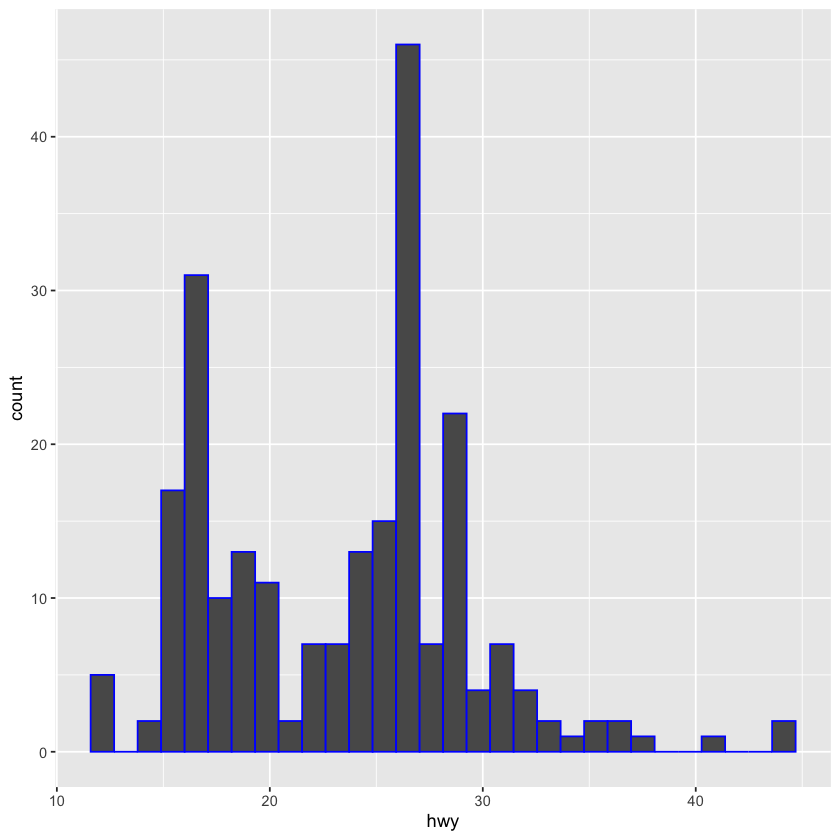

In [48]:
ggplot(data = mpg, aes(x = hwy)) +
    geom_histogram(color="blue") 

Here we see `ggplot` give us an message that `statbin()` is using `bins=30`. We could change this and unlike `hist()` `ggplot` will give us the exact number of bins we request.

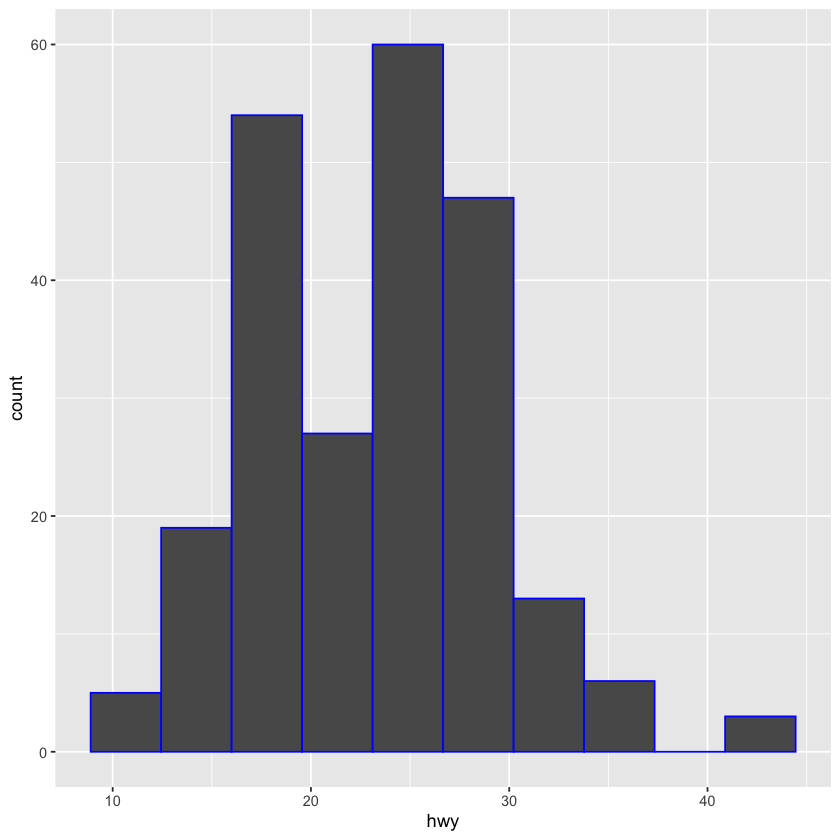

In [49]:
ggplot(data = mpg, aes(x = hwy)) +
    geom_histogram(bins=10,color="blue") 

`geom_smooth`: 

If we wish to indentify a trend in the data, then we can use `geom_smooth`. In this geometry, we can specify the method that we would like to use, i.e. the type of trend we wish to identify

`geom_smooth()` using method = 'loess' and formula 'y ~ x'



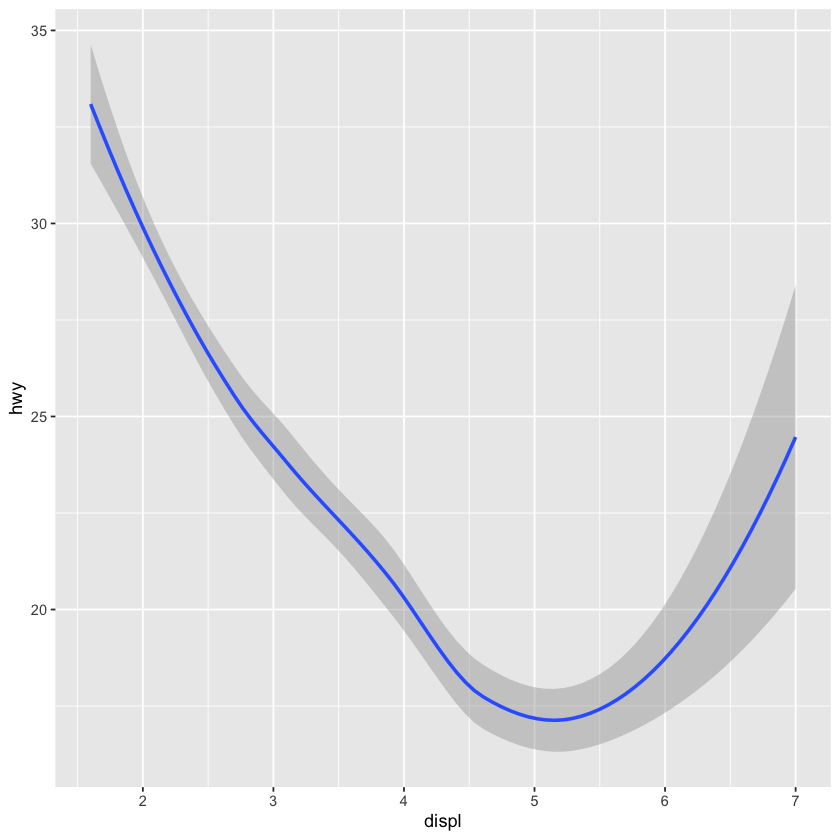

In [50]:
ggplot(mpg, aes(x = displ, y = hwy)) +
    geom_smooth()

By default `ggplot` chooses the method `loess` which stands for "locally estimated scatterplot smoothing." If we would rather specify a line or a parabola then we could use `method=lm` which defaults to linear or `method = "lm", formula = y ~ x + I(x^2)` which defines the formula to be quadratic

`geom_smooth()` using formula 'y ~ x'



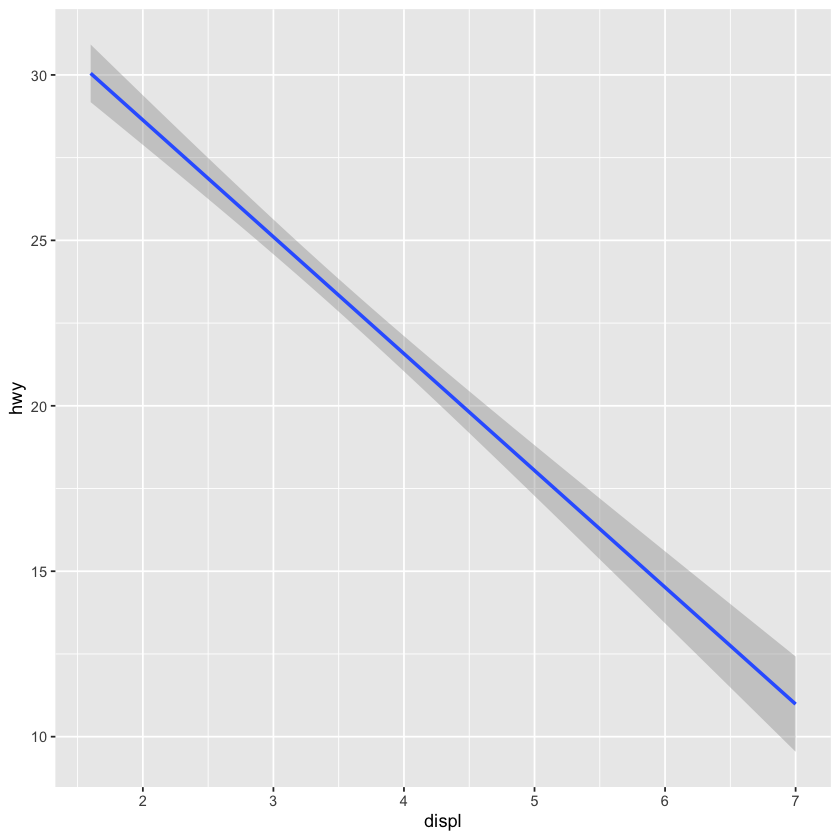

In [51]:
ggplot(mpg, aes(x = displ, y = hwy)) +
    geom_smooth(method=lm)

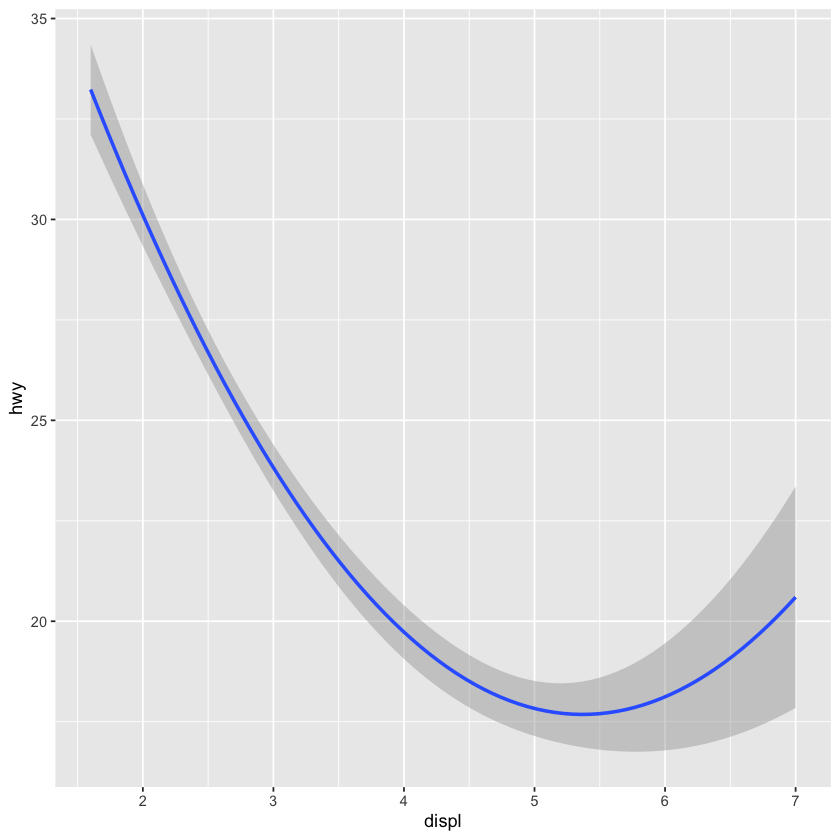

In [52]:
ggplot(mpg, aes(x = displ, y = hwy)) +
    geom_smooth(method = "lm", formula = y ~ x + I(x^2))

Of course this doesn't really help us see any behavior about the data because we have only plotted our regression plots. What makes ggplot2 really powerful is the simpliity with which you can add multiple geometries to a plot, thus allowing you to create complex graphics showing multiple aspects of your data. It is easy enough to add our scatterplot to these regression plots

`geom_smooth()` using method = 'loess' and formula 'y ~ x'



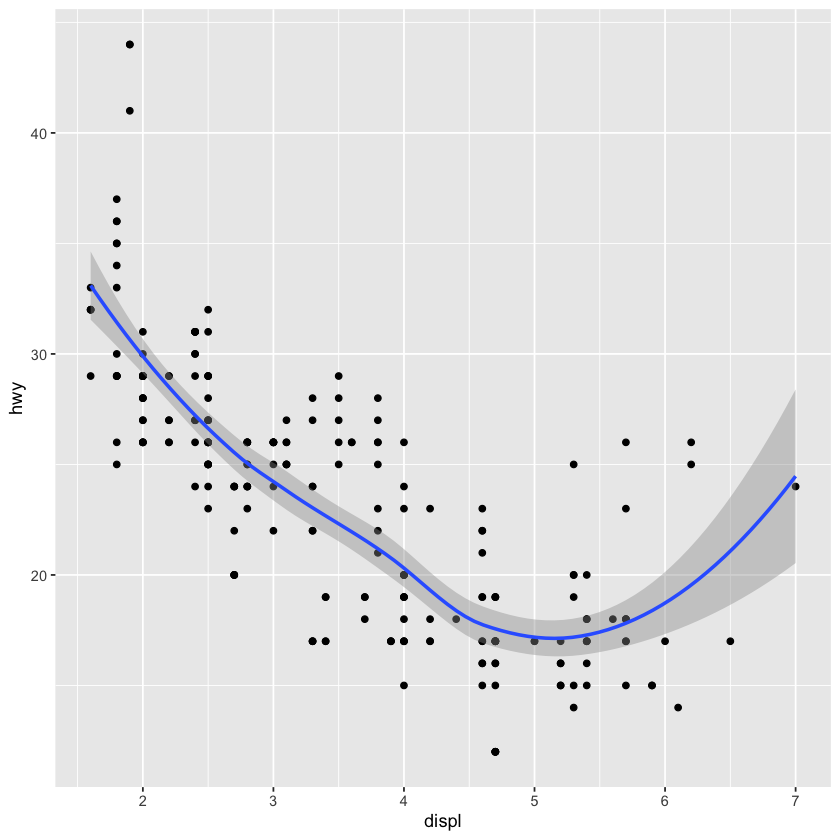

In [53]:
ggplot(mpg, aes(x = displ, y = hwy)) +
    geom_point() +
    geom_smooth()

`geom_smooth()` using formula 'y ~ x'



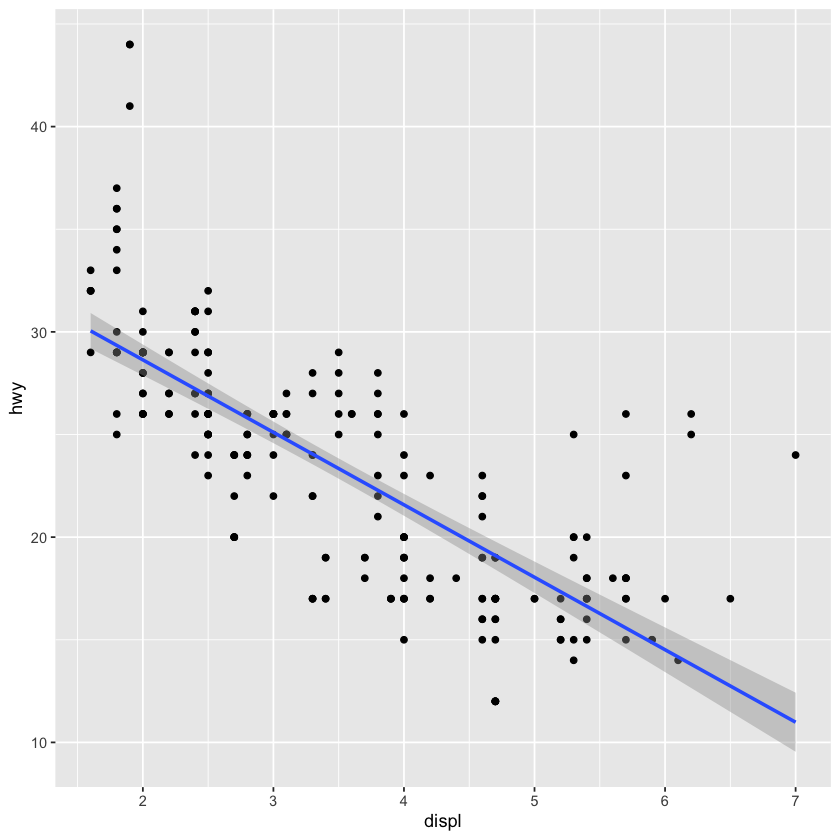

In [54]:
ggplot(mpg, aes(x = displ, y = hwy)) +
    geom_point() +
    geom_smooth(method=lm)

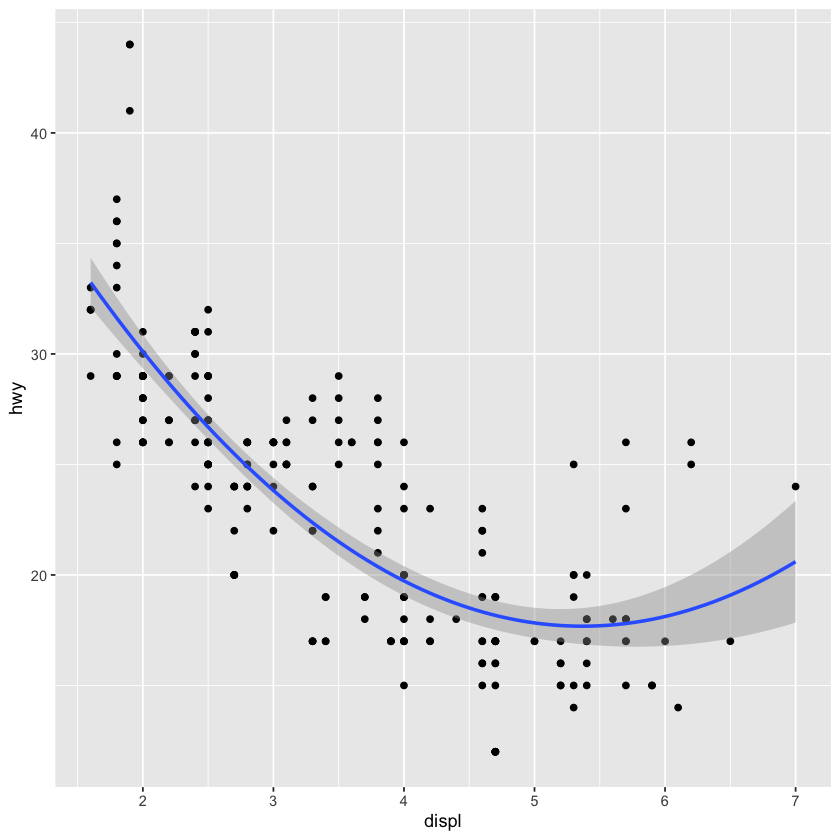

In [55]:
ggplot(mpg, aes(x = displ, y = hwy)) +
    geom_point() +
    geom_smooth(method = "lm", formula = y ~ x + I(x^2))

As I mentioned above, the aesthetics for each geom can be different, so you could show multiple lines on the same plot (or with different colors, styles, etc). It’s also possible to give each geom a different data argument, so that you can show multiple data sets in the same plot.

For example, we can plot both points, the `loess` line, linear approximation, and quadratic approximation, for the same x and y variable but specify unique colors within each geom: 

`geom_smooth()` using method = 'loess' and formula 'y ~ x'

`geom_smooth()` using formula 'y ~ x'



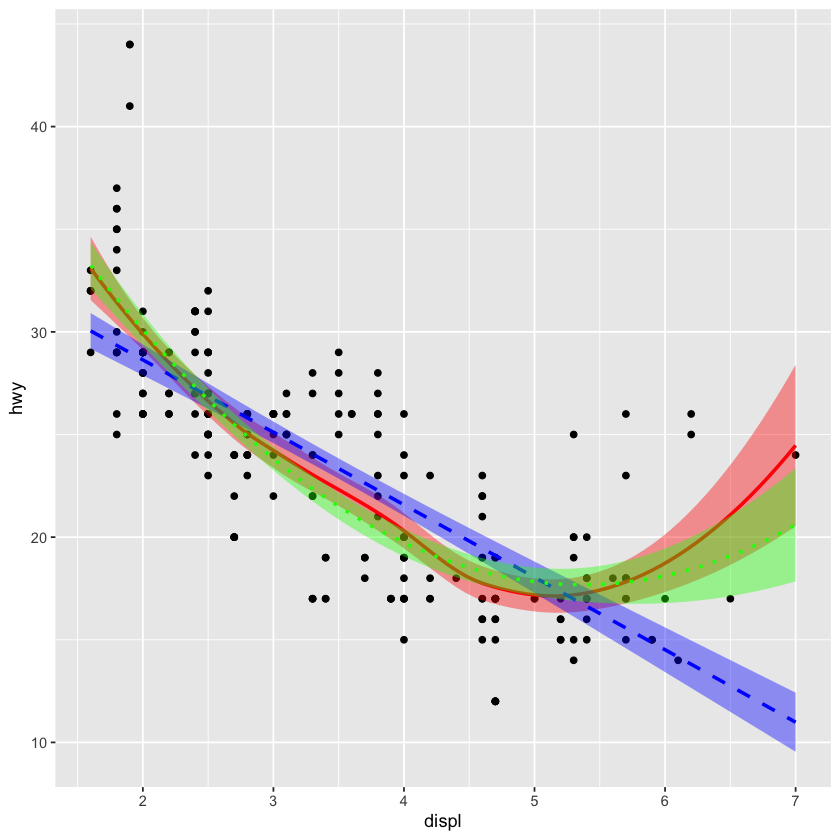

In [60]:
ggplot(mpg, aes(x = displ, y = hwy)) +
    geom_point() +
    geom_smooth(linetype=1, color="red", fill="red")+
    geom_smooth(method="lm", linetype=2, color="blue", fill="blue") +
    geom_smooth(method = "lm", formula = y ~ x + I(x^2), linetype=3, color="green", fill="green")

## Quantile Plots

For discrete distributions like the Binomial or Poisson distribution, the type of data collected can give us insight into the distribution to use as a model, i.e. we use Possion for events in an area over a specified time period. But for many situations, it is less straightforward to determine the appropriate distribution to use. When we have sample data, one tool that is used to determine whether a distribution is appropriate to use is called a quantile plot.

In quantile plots, one axis represents the observed data, and the other axis represents what we would have expected to see if the data were coming from some specified distribution. If the observed data line up with what we would expect, the resulting plot will be a straight line.

Most frequently, these plots are used to assess whether data are normally distributed. A normal quantile plot (also sometimes called a normal q-q plot or a normality plot) should show a series of points falling approximately on a straight line if data are normally distributed. Strong non-linear patterns in a normal quantile plot indicate that the data are not normally distributed.

Luckily `ggplot2` has a geometry that allows us to create quantile plots. 

In a previous lab, one project assumed that the measurements from the `morely` data set were normally distributed. Let’s use a quantile plot to investigate this. 

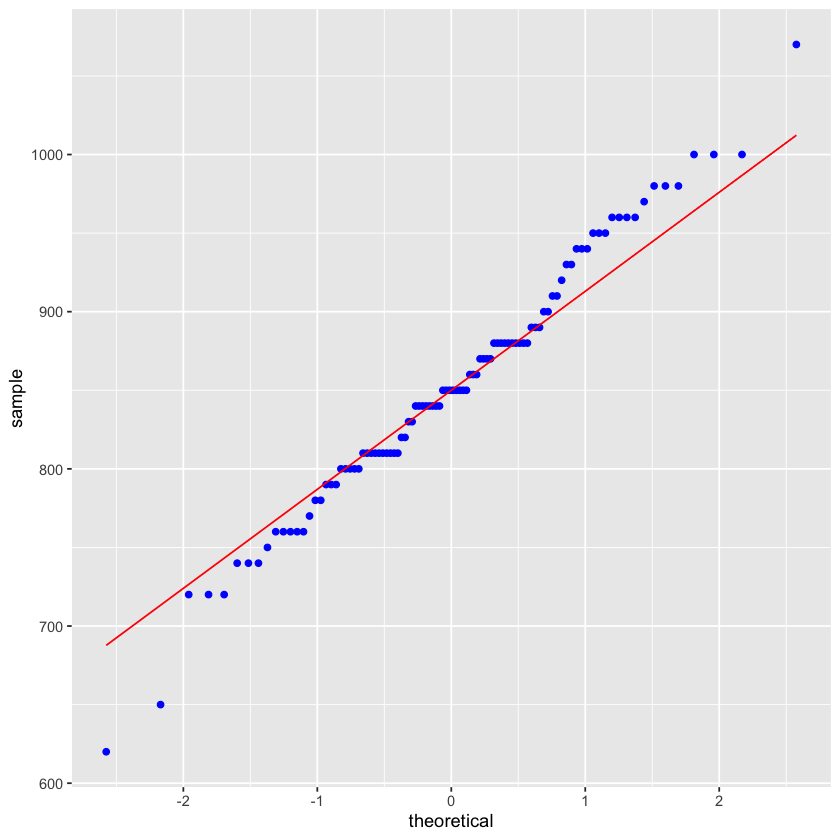

In [61]:
ggplot(morley, aes(sample=Speed))+
    stat_qq(color="blue")+stat_qq_line(color="red")

In the aesthetics of `ggplot` function you need to specify the data that you are interested in. In this case we are interested in the `Speed` column and so `sample=Speed`.

The red line here repesents the line that our data would follow if it was exactly normal. We can see that around theoretical 0 and sample 850 the `morley` data is very close to being normal. This suggests that the morley data is very normal close to its mean.

What happens if we use exactly normal data?

In [62]:
normal_data<-rnorm(1000)
normal_data<-data.frame(normal_data)
colnames(normal_data)<-"observations"

The function `ggplot2` does not allow vectors as inputs. It will only accept data frame or tibbles. In the code above I create a vector of normally distributed data, then create a data frame and give the column an appropriate name. 

In [63]:
str(normal_data)

'data.frame':	1000 obs. of  1 variable:
 $ observations: num  -0.2932 -1.3794 0.0122 -0.084 0.3126 ...


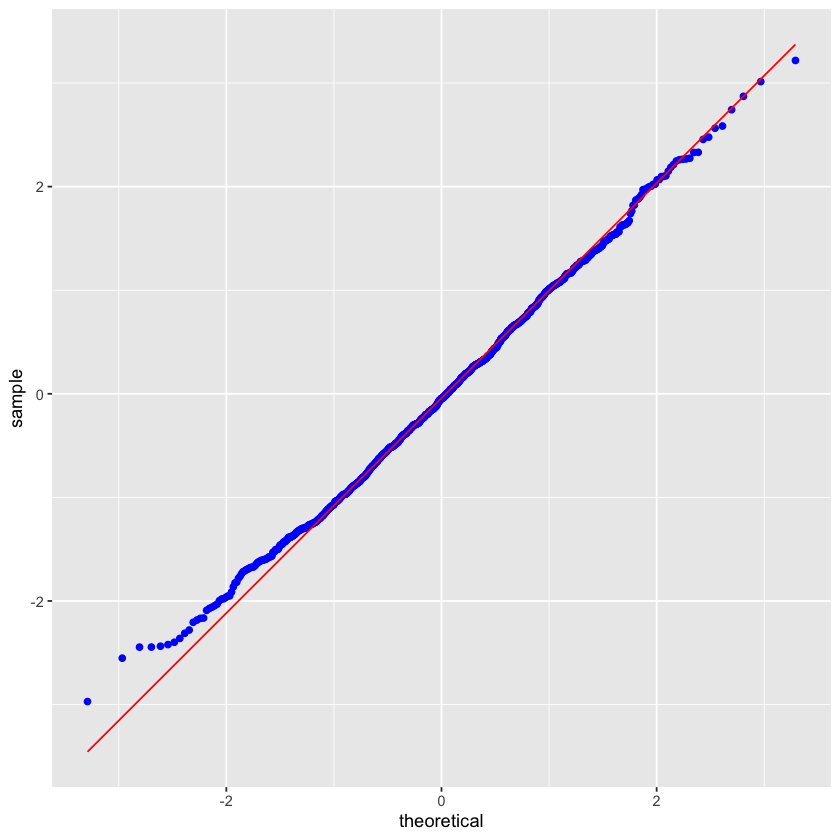

In [65]:
ggplot(normal_data,aes(sample=observations))+
    stat_qq(color="blue")+stat_qq_line(color="red")

As you can see, the data follows the red line almost exactly. Let's see what happens when we use exponential data.

In [73]:
exponential_data<-rexp(1000)
exponential_data<-data.frame(exponential_data)
colnames(exponential_data)<-"observations"

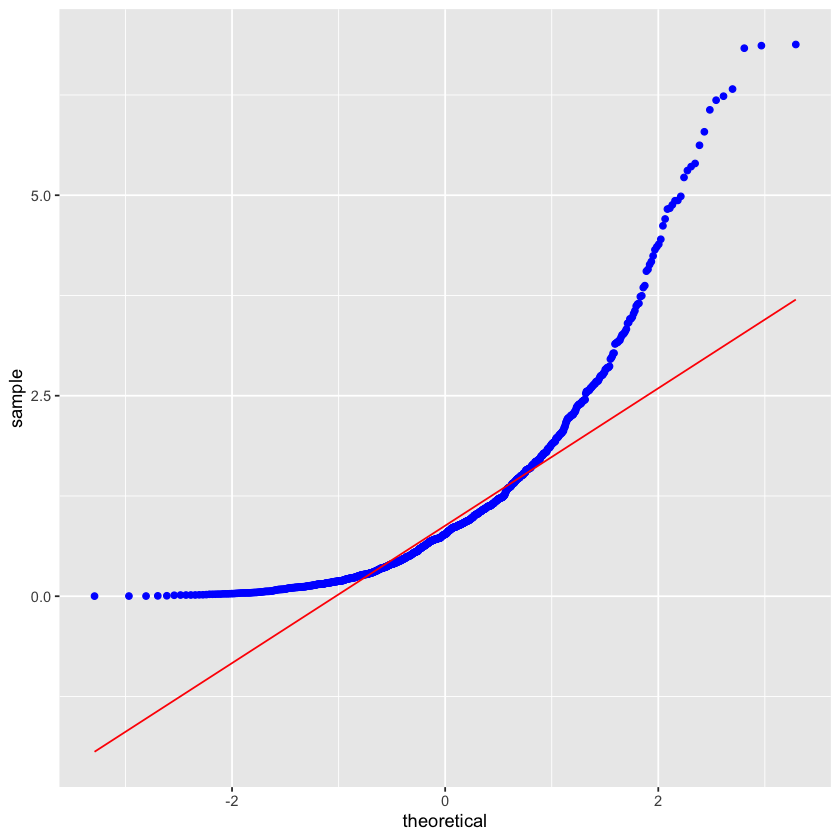

In [74]:
ggplot(exponential_data,aes(sample=observations))+
    stat_qq(color="blue")+stat_qq_line(color="red")

Notice that our data (the dots in blue) are nowhere near the predicted red line.  This would mean that the data that we have in this case (our exponential data) is not normal.

If we wanted to check our data against another distribution, then all we need to do is specify the quantile function from the distribution we want to use via `distribution=q[DIST]`. Let's check whether our exponential is actually exponential.

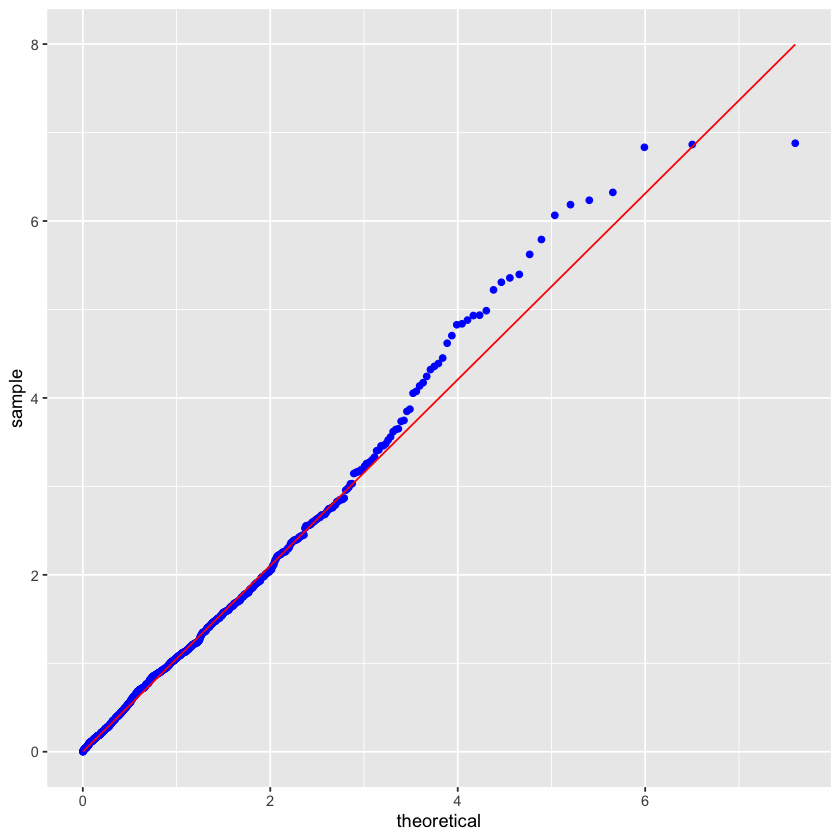

In [75]:
ggplot(exponential_data,aes(sample=observations))+
    stat_qq(color="blue", distribution = qexp)+stat_qq_line(color="red", distribution = qexp)

Here we can see that in this case when we check our exponential data against the exponential distribution, our data points are much more closely aligned with the theoretical red line.

Finally, one thing that is nice about using `ggplot` is that we can still pass aesthetics into our quantile plot. When we check to see if the `cty` observations in the `mpg` data are normal.

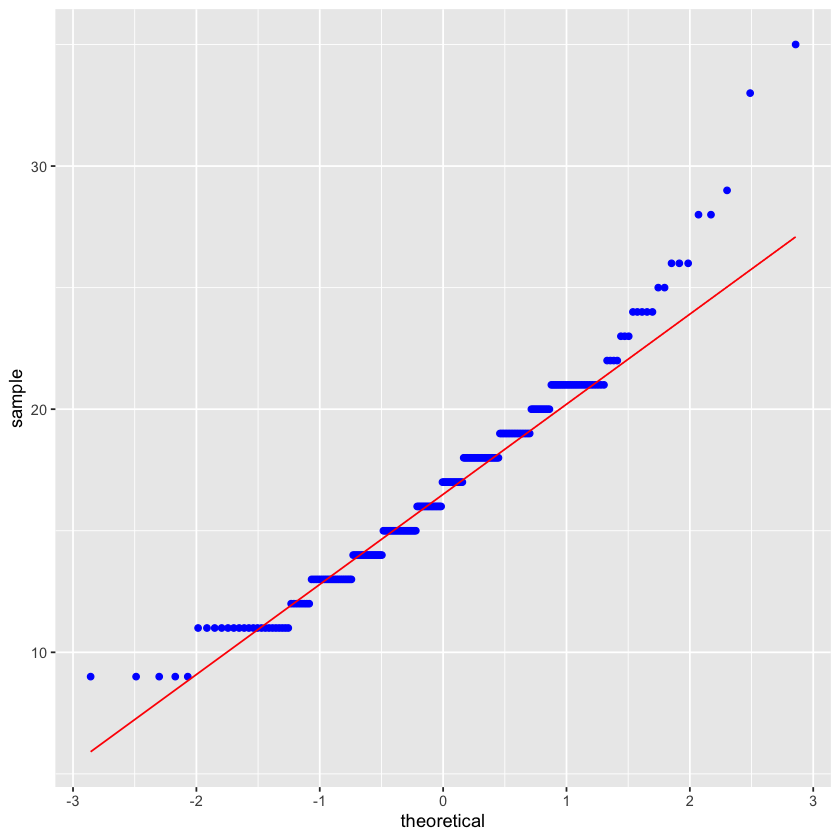

In [83]:
ggplot(mpg,aes(sample=cty))+
    stat_qq(color="blue")+stat_qq_line(color="red")

As we can see, the data looks slightly normal but isn't exactly normal. This is mainly because of the right side of the graph tends upward. Now what happens if we separate our data according to the number of cylinders.

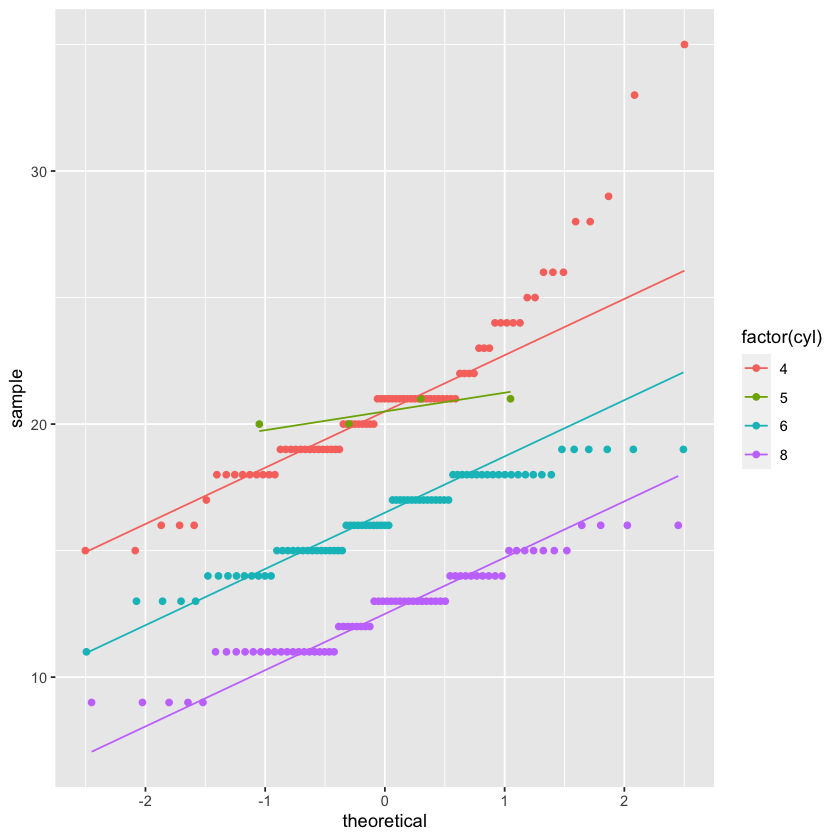

In [94]:
ggplot(mpg,aes(sample=cty, color=factor(cyl)))+
    stat_qq()+stat_qq_line()

We can now see that this upward slope on the right side of the plot was due to the 4-cylinder vehicles. Both the 6 and 8 cylinder vehicles seem to follow the normal curve more closely although still not exactly. We would most likely need to do some more exploration to find out the distribution that describes the population of city gas milage in vehicles.